<h1 style="color:#323232;font-size:60px;font-family:Georgia;text-align:center;"><strong>Analysis of Google Playstore Apps</h1>

<h1 style="color:#323232;font-size:50px;font-family:Georgia;text-align:center;"><strong>Author: Owolabi Abdulquawiyy Adisa</b></h1>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#323232; font-size:50px;"><strong>Content<br> 
    
1. Overview
2. Importing Libraries
3. Reading Dataset
4. Data Cleaning
5. EDA


# Overview

In this project, google playstore app will be analyzed. The data is from [Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv). The dataset contains 10841 entries and 13 column. The data was cleaned and Exploratory Data Analysis (EDA) was done.

# Import Libraries
__The following libraries will be used:__
- 1. `numpy`: numerical analysis
- 2. `pandas`: data analysis
- 3. `seaborn and matplotlib`: data vizualisation
- 4. `opendatasets`: to download dataset

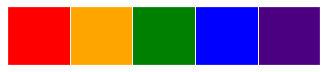

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import opendatasets as od
import seaborn as sns
import matplotlib.style as sty
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_specTrue

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rc('lines', lw=2, c='r')
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

colors = ['red', 'orange', 'green','blue', 'indigo']
sns.palplot(sns.color_palette(colors));
plt.show()

__Download the dataset from [Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv)__

In [2]:
file = od.download('https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv')

Skipping, found downloaded files in "./google-play-store-apps" (use force=True to force download)


__Read the dataset using pandas__

In [3]:
df = pd.read_csv('./google-play-store-apps/googleplaystore.csv')

__Let us view the dataset and see the content__

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


__Overview of the dataset__

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


__The dataset has 13 columns and 10841 rows__

__Statistical Summary__

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


__As it stands, only Ratings column as numerical values, others are object__

In [7]:
# name of columns in the dataset

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Data Cleaning

- __I will replace the whitespace(s) in the columns name as '_' for better understanding__

In [8]:
df.columns = df.columns.str.replace(' ', '_')

__Let us check if the changes occur or not__

In [9]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

- __Next, I will check the unique values in each column__

In [10]:
for col in df:
    print(col)
    print(df[col].unique())
    print('-'*20)

App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
--------------------
Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
--------------------
Rating
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
--------------------

__Check for duplicated data__

In [11]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


__There as 483 entries that are duplicate, then, there may be chance that the App name, and one of the other column has the same entries. Therefore, I will find duplicate entries across the column and drop any row with same entries__

In [12]:
df.drop_duplicates(['App', 'Size', 'Installs', 'Type', 'Genres'], inplace=True)
df.duplicated().sum()

0

__Next, I will take care of NaN entries in the dataset__

In [13]:
df.isna().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

`Rating` column has 1464 `Nan` entries, while `Current_Ver` and `Android_Ver` has 8 and 3 respectively

In [14]:
missing_rows = df.isnull()

In [15]:
for col in missing_rows.columns.values.tolist():
    print(col)
    print(missing_rows[col].value_counts())
    print('-'*20)

App
False    9681
Name: App, dtype: int64
--------------------
Category
False    9681
Name: Category, dtype: int64
--------------------
Rating
False    8217
True     1464
Name: Rating, dtype: int64
--------------------
Reviews
False    9681
Name: Reviews, dtype: int64
--------------------
Size
False    9681
Name: Size, dtype: int64
--------------------
Installs
False    9681
Name: Installs, dtype: int64
--------------------
Type
False    9680
True        1
Name: Type, dtype: int64
--------------------
Price
False    9681
Name: Price, dtype: int64
--------------------
Content_Rating
False    9680
True        1
Name: Content_Rating, dtype: int64
--------------------
Genres
False    9681
Name: Genres, dtype: int64
--------------------
Last_Updated
False    9681
Name: Last_Updated, dtype: int64
--------------------
Current_Ver
False    9673
True        8
Name: Current_Ver, dtype: int64
--------------------
Android_Ver
False    9678
True        3
Name: Android_Ver, dtype: int64
------------

__The NaN values will be dropped because the `Rating` column having the most NaN value is part of EDA__

In [16]:
df.dropna(inplace=True)

df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

__Now, I will clean the data column by column__

`Price` column

In [17]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

__I will strip the $ sign in the `Price` column t have the column in floating point__

In [18]:
df.Price = df.Price.apply(lambda x: x.replace('$', '').replace(',','')
                                   if isinstance(x, str) else x).astype(float)

In [19]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

___Let us check the changes___

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8210 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8210 non-null   object 
 1   Category        8210 non-null   object 
 2   Rating          8210 non-null   float64
 3   Reviews         8210 non-null   object 
 4   Size            8210 non-null   object 
 5   Installs        8210 non-null   object 
 6   Type            8210 non-null   object 
 7   Price           8210 non-null   float64
 8   Content_Rating  8210 non-null   object 
 9   Genres          8210 non-null   object 
 10  Last_Updated    8210 non-null   object 
 11  Current_Ver     8210 non-null   object 
 12  Android_Ver     8210 non-null   object 
dtypes: float64(2), object(11)
memory usage: 898.0+ KB


In [21]:
df.Reviews = df.Reviews.astype(int)

df.Reviews.unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

`Size` Column

In [22]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

__For `Size` column to make better sense, I will strip the M and k and covert the values to Kilobyte__

In [23]:
df = df[df.Size != 'Varies with device']

In [24]:
df['Si'] = df.Size.str[:-1].astype(float)
df['KM'] = df.Size.str[-1]
df['KM'] = df.KM.replace(['k', 'M'], [1, 1024])

In [25]:
df.KM.unique()

array([1024,    1])

In [26]:
df.Size = df.KM * df.Si

In [27]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [28]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [29]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Si,KM


__Recode the install column__

In [30]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [31]:
df.Installs = df.Installs.map({'10,000+' : 10000, '1,000+' : 1000, '5,000+' : 5000, '50,000+' : 50000, '100,000+': 100000, '100+': 100,
                         '10+' : 10, '500+' : 500, '50+' :50, '10,000,000+':100000000, '1,000,000+':1000000, '500,000+' : 500000,
                         '1+' : 1, '5,000,000+' : 5000000, '50,000,000+' : 50000000, '100,000,000+': 100000000,
                         '1,000,000,000+' : 1000000000, '500,000,000+' : 5000000000, '5+' : 5})

In [32]:
df.drop(columns= ['Si', 'KM'], inplace=True)

__Now, Let us check our data very well before moving to EDA__

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,7039.0,4.161202e+00,5.587983e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,7039.0,1.459494e+05,1.027101e+06,1.0,85.0,1563.0,26848.0,4.489172e+07
Size,7039.0,2.228158e+04,2.326649e+04,8.5,5017.6,13312.0,31744.0,1.024000e+05
Installs,7039.0,1.791602e+07,1.717069e+08,1.0,10000.0,100000.0,1000000.0,5.000000e+09
Price,7039.0,1.171219e+00,1.818216e+01,0.0,0.0,0.0,0.0,4.000000e+02


In [35]:
jovian.commit(project='GooglePlayStore_Project', environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "huygens123/googleplaystore-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/huygens123/googleplaystore-project


'https://jovian.ai/huygens123/googleplaystore-project'

# Exploratory Data Analysis 

- Let us check the type of data set available 

In [36]:
#for categorical variable
categorical = [variable for variable in df.columns 
            if df[variable].dtype == 'O']

# for numerical variable
numerical = [variable for variable in df.columns
           if df[variable].dtype != 'O']

print('The number of categorical variables in the dataset is: {}'.format(len(categorical)))
print('The number of numerical variables in the dataset is: {}'.format(len(numerical)))

The number of categorical variables in the dataset is: 8
The number of numerical variables in the dataset is: 5


__What is the correlation among the numerical variables?__

In [37]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.067801,0.062779,0.031256,-0.021205
Reviews,0.067801,1.000000,0.181866,0.365966,-0.009030
Size,0.062779,0.181866,1.000000,0.074399,-0.025697
Installs,0.031256,0.365966,0.074399,1.000000,-0.006709
Price,-0.021205,-0.009030,-0.025697,-0.006709,1.000000


__Let us vizualise this using heatmap__

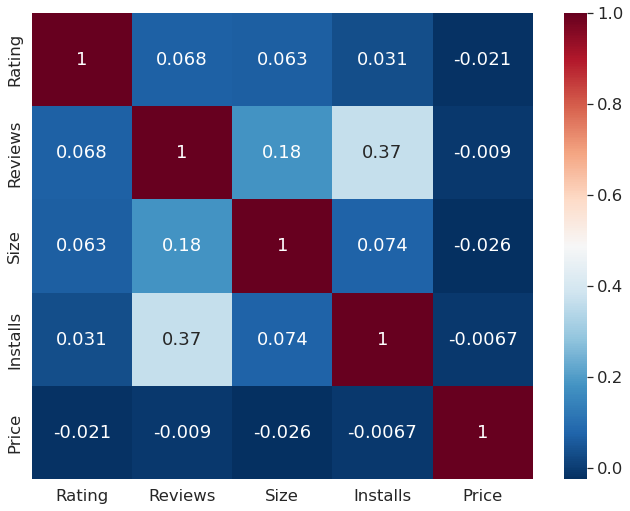

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap = 'RdBu_r', annot= True);

__`Installs` column and `Reviews` column have the best correlation followed by `Size` and `Review`__

__Let us check and vizualise how the type of App are distributed i.e free or paid__

In [39]:
Type = df.Type.value_counts()
Type

Free    6500
Paid     539
Name: Type, dtype: int64

So, there are 6,500 apps that are free while the other 539 are paid app

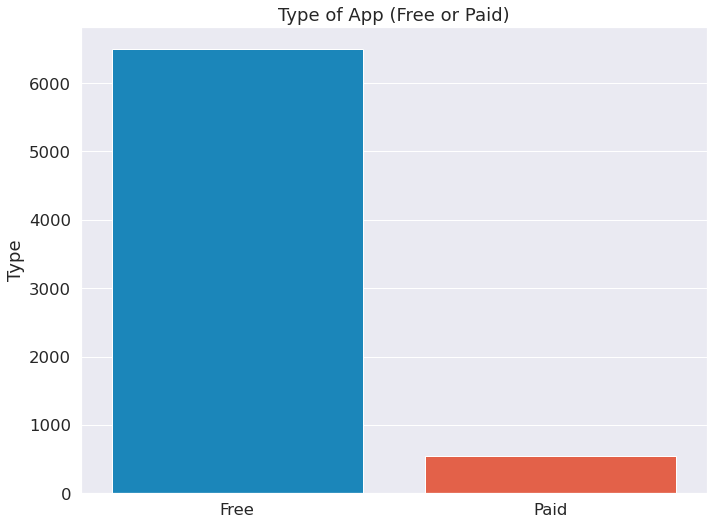

In [40]:
plt.figure(figsize=(10, 8))
sns.barplot(x = Type.index, y = Type);
plt.title("Type of App (Free or Paid)");

### Category

__First, let's check the number of `App` in each `Category`__

In [41]:
Category = df.Category.value_counts()
Category

FAMILY                 1515
GAME                    835
TOOLS                   627
PERSONALIZATION         274
MEDICAL                 270
LIFESTYLE               269
FINANCE                 258
PRODUCTIVITY            224
BUSINESS                222
SPORTS                  221
PHOTOGRAPHY             206
HEALTH_AND_FITNESS      191
COMMUNICATION           189
SOCIAL                  156
NEWS_AND_MAGAZINES      154
SHOPPING                146
TRAVEL_AND_LOCAL        141
BOOKS_AND_REFERENCE     141
DATING                  122
VIDEO_PLAYERS           113
MAPS_AND_NAVIGATION      94
EDUCATION                88
FOOD_AND_DRINK           72
ENTERTAINMENT            64
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       60
ART_AND_DESIGN           58
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

__Family has the highest number of App (1515) while Beauty is lowest represented (37)__

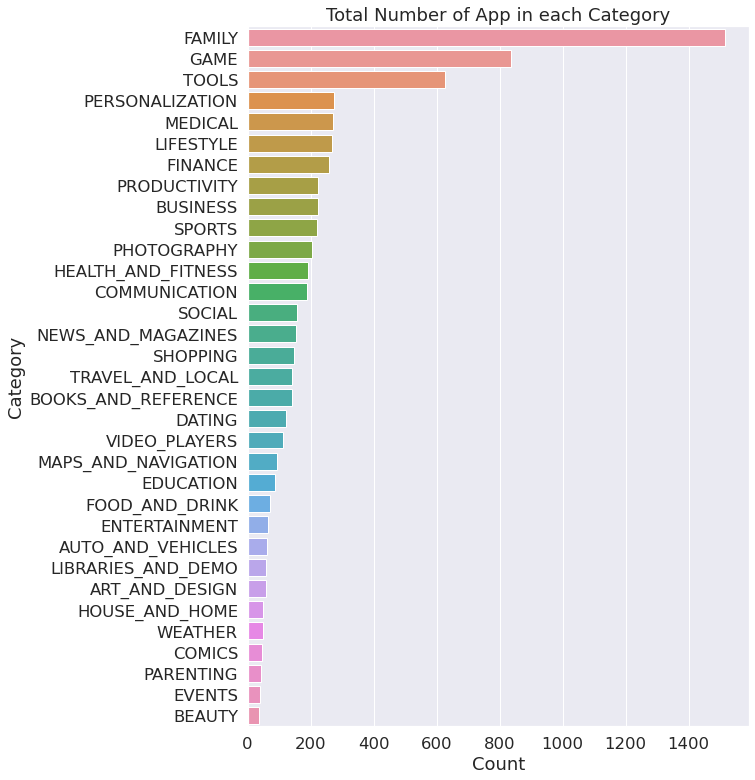

In [42]:
plt.figure(figsize=(8, 12))
sns.barplot(y = Category.index, x = Category)
plt.ylabel('Category')
plt.xlabel('Count')
plt.title("Total Number of App in each Category");

### Content Ratings

Next, Let us check the distribution of `Content_Rating` column 

In [43]:
Content_Rating = df.Content_Rating.value_counts()
Content_Rating

Everyone           5694
Teen                779
Mature 17+          304
Everyone 10+        259
Adults only 18+       2
Unrated               1
Name: Content_Rating, dtype: int64

__Majority of the Apps is either for Everyone or for Teen.
Let us vizualise this with bar chart__

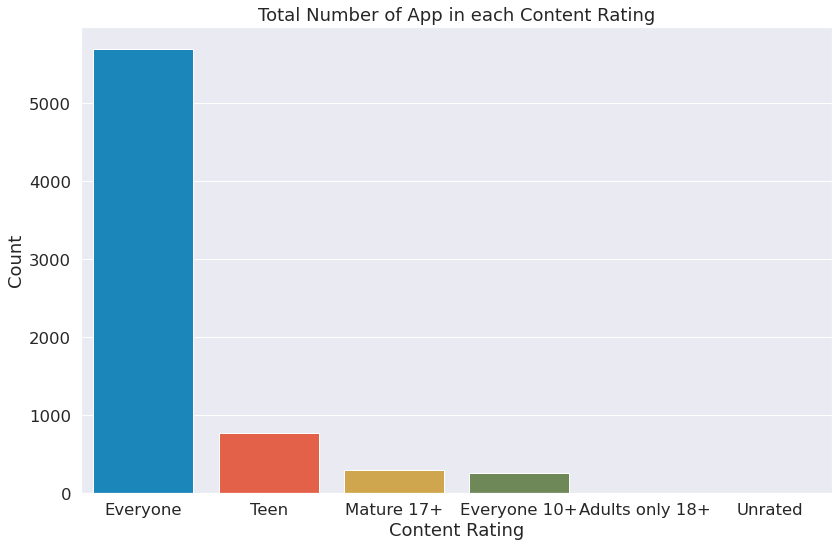

In [44]:
plt.figure(figsize= (12, 8))
sns.barplot(x = Content_Rating.index, y = Content_Rating)
plt.ylabel('Count')
plt.xlabel('Content Rating')
plt.title("Total Number of App in each Content Rating");

### Genres

In [45]:
Genre  = df.Genres.value_counts()
Genre

Tools                     627
Entertainment             417
Education                 392
Action                    276
Personalization           274
                         ... 
Card;Brain Games            1
Lifestyle;Pretend Play      1
Education;Brain Games       1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 112, dtype: int64

__Tools app and Entertainment app take the lead while Strategy and Creativity app are least represented__

In [46]:
# vizualie to 10 Genres
Genre = Genre.sort_values(ascending=False).head(10)

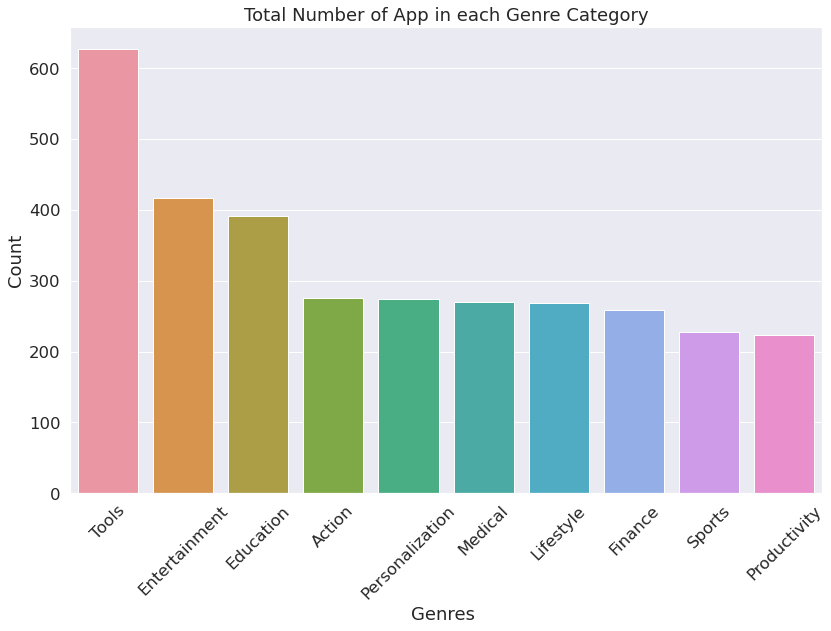

In [47]:
plt.figure(figsize= (12, 8))
sns.barplot(x = Genre.index, y = Genre)
plt.ylabel('Count')
plt.xlabel('Genres ')
plt.title("Total Number of App in each Genre Category")
plt.xticks(rotation = 45);

__Next, I will show the distribution of continuous values__

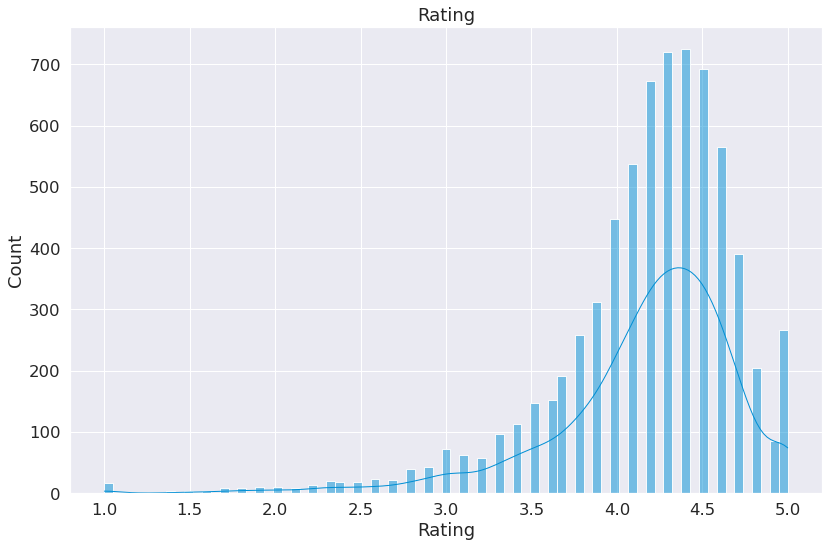

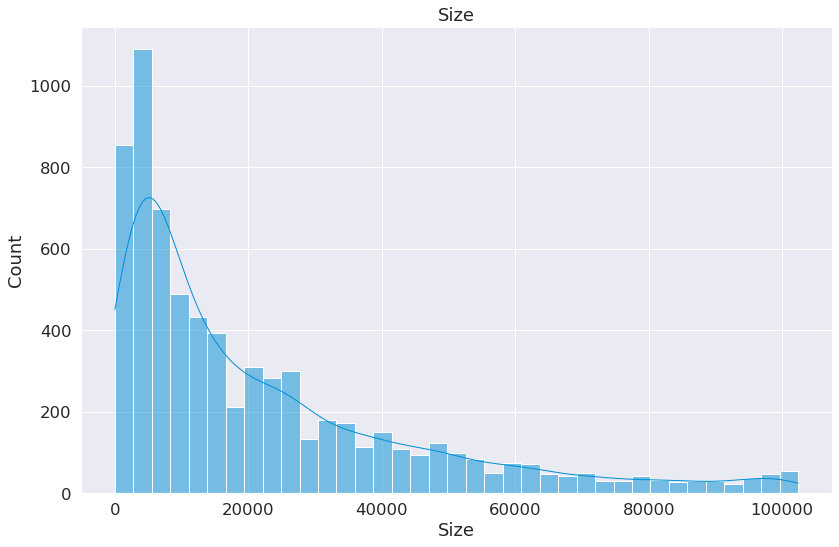

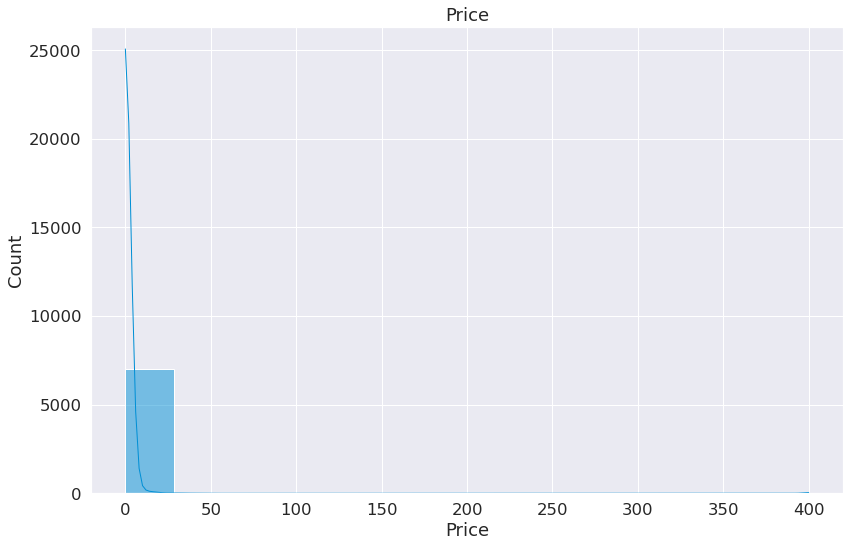

In [48]:
# Plotting continous features 
continous_features = df.select_dtypes(['float64']).columns.to_list()

for cont_feature in continous_features: 
    plt.figure(figsize= (12, 8))
    ax = sns.histplot(df[cont_feature], kde = True)
    plt.title(cont_feature);

__Ratings column is skewed to the right while the `Size` column is skewed to the right.
The impplication of this is that, there are higher ratings in the dataset than low rating.
Consequently, the `Size` column shows that there are more smaller (size) app in the dataset than heavier app__

# QUESTIONS

__In this section, I will ask some questions based on EDA above and answer them__

List of top 10 most installed and Rating  `App`

In [49]:
App = df.groupby('App')[['Installs', 'Rating', 'Size', 'Price', 'Reviews']].mean()
App

,Installs,Rating,Size,Price,Reviews
App,,,,,
+Download 4 Instagram Twitter,1000000.0,4.5,22528.0,0.00,40467.0
- Free Comics - Comic Apps,10000.0,3.5,9318.4,0.00,115.0
.R,10000.0,4.5,203.0,0.00,259.0
/u/app,10000.0,4.7,54272.0,0.00,573.0
058.ba,100.0,4.4,14336.0,0.00,27.0
...,...,...,...,...,...
감성학원 BL 첫사랑,10000.0,4.4,34816.0,0.00,190.0
💎 I'm rich,10000.0,3.8,26624.0,399.99,718.0
"💘 WhatsLov: Smileys of love, stickers and GIF",1000000.0,4.6,18432.0,0.00,22098.0


__Most Installed App__

In [50]:
App_installs = App.sort_values('Installs', ascending=False).head(10)
App_installs

,Installs,Rating,Size,Price,Reviews
App,,,,,
Samsung Health,5.000000e+09,4.3,71680.0,0.0,480208.0
UC Browser - Fast Download Private & Secure,5.000000e+09,4.5,40960.0,0.0,17712922.0
Temple Run 2,5.000000e+09,4.3,63488.0,0.0,8118609.0
SHAREit - Transfer & Share,5.000000e+09,4.6,17408.0,0.0,7790693.0
Dropbox,5.000000e+09,4.4,62464.0,0.0,1861310.0
imo free video calls and chat,5.000000e+09,4.3,11264.0,0.0,4785892.0
Candy Crush Saga,5.000000e+09,4.4,75776.0,0.0,22426677.0
Pou,5.000000e+09,4.3,24576.0,0.0,10485308.0
Subway Surfers,1.000000e+09,4.5,77824.0,0.0,27722264.0


__Clearly, Samsung Health app has the most total installs__

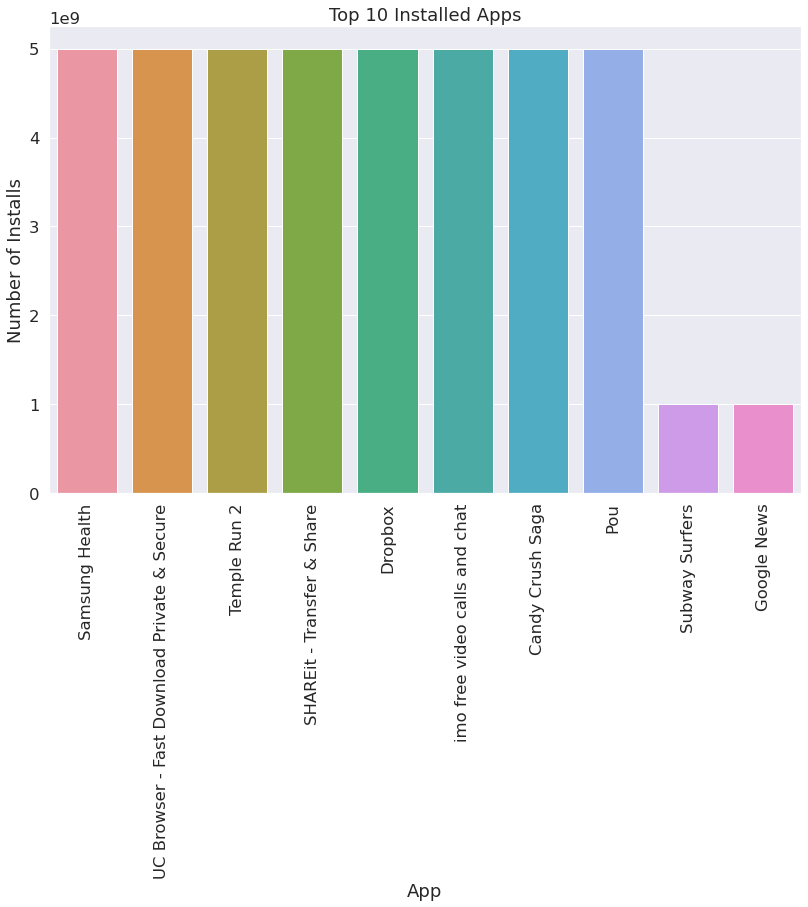

In [51]:
plt.figure(figsize= (12, 8))
sns.barplot(x = App_installs.index, y = App_installs.Installs)
plt.title("Top 10 Installed Apps")
plt.ylabel("Number of Installs")
plt.xticks(rotation = 90);

__Most Reviewed App__

In [52]:
App_Review = App.sort_values('Reviews', ascending=False).head(10)
App_Review

,Installs,Rating,Size,Price,Reviews
App,,,,,
Clash of Clans,1.000000e+08,4.6,100352.0,0.0,44891723.0
Subway Surfers,1.000000e+09,4.5,77824.0,0.0,27722264.0
Clash Royale,1.000000e+08,4.6,99328.0,0.0,23133508.0
Candy Crush Saga,5.000000e+09,4.4,75776.0,0.0,22426677.0
UC Browser - Fast Download Private & Secure,5.000000e+09,4.5,40960.0,0.0,17712922.0
8 Ball Pool,1.000000e+08,4.5,53248.0,0.0,14198297.0
DU Battery Saver - Battery Charger & Battery Life,1.000000e+08,4.5,14336.0,0.0,13479633.0
Cache Cleaner-DU Speed Booster (booster & cleaner),1.000000e+08,4.5,15360.0,0.0,12759663.0
Shadow Fight 2,1.000000e+08,4.6,90112.0,0.0,10979062.0


__Clash of Clans has the most reviews of 100352__

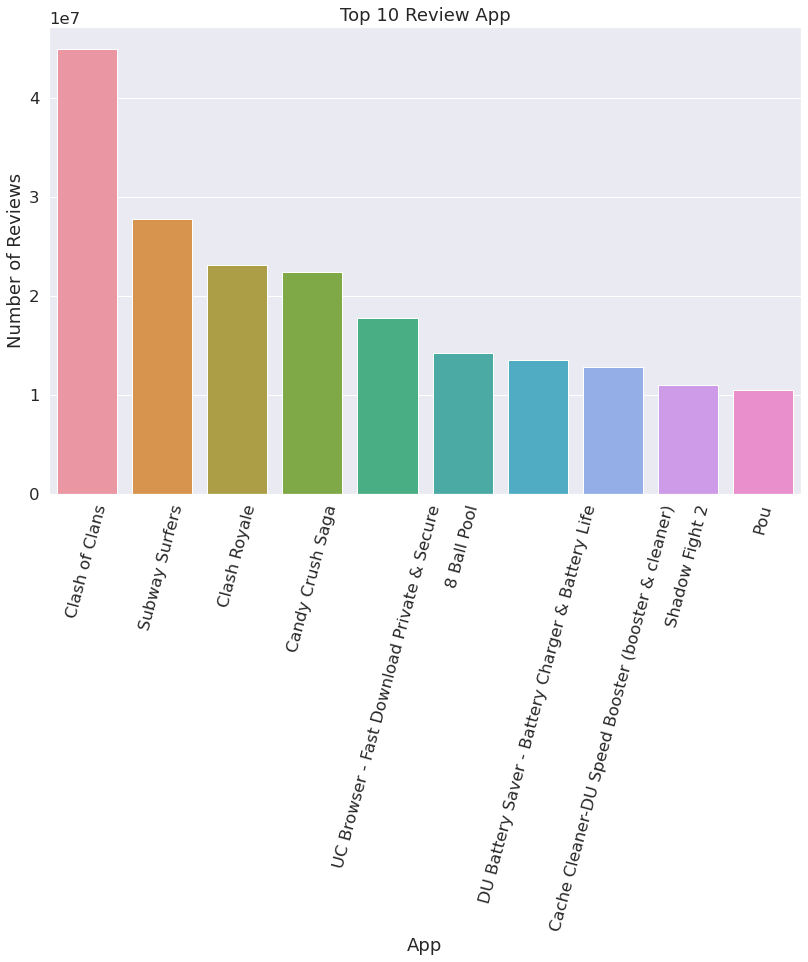

In [53]:
plt.figure(figsize= (12, 8))
sns.barplot(x = App_Review.index, y = App_Review.Reviews)
plt.title("Top 10 Review App")
plt.ylabel("Number of Reviews")
plt.xticks(rotation = 75);

__Most Cost App__

In [54]:
App_Price = App.sort_values('Price', ascending=False).head(10)
App_Price

,Installs,Rating,Size,Price,Reviews
App,,,,,
I'm Rich - Trump Edition,10000.0,3.6,7475.2,400.00,275.0
I AM RICH PRO PLUS,1000.0,4.0,41984.0,399.99,36.0
I am rich(premium),5000.0,3.5,965.0,399.99,472.0
I Am Rich Pro,5000.0,4.4,2764.8,399.99,201.0
most expensive app (H),100.0,4.3,1536.0,399.99,6.0
💎 I'm rich,10000.0,3.8,26624.0,399.99,718.0
I Am Rich Premium,50000.0,4.1,4812.8,399.99,1867.0
I am Rich Plus,10000.0,4.0,8908.8,399.99,856.0
I am Rich!,1000.0,3.8,22528.0,399.99,93.0


I'm Rich - Trump Edition is the most costly app priced at 400 Dollars

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


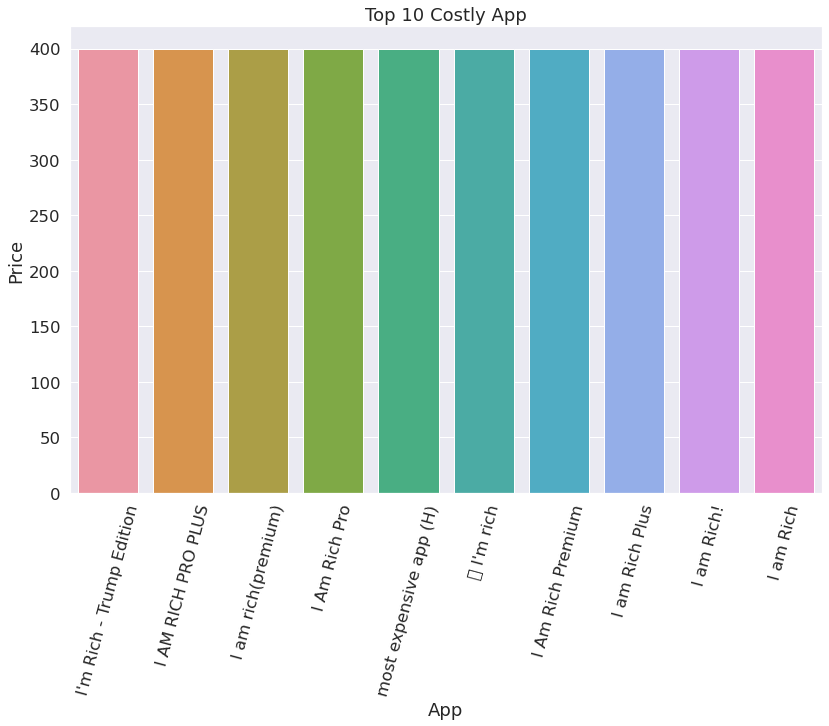

In [55]:
plt.figure(figsize= (12, 8))
sns.barplot(x = App_Price.index, y = App_Price.Price)
plt.title("Top 10 Costly App")
plt.ylabel("Price")
plt.xticks(rotation = 75);

### Top 10 Categories

In [56]:
Category_rate = df.groupby('Category')[['Installs', 'Rating', 'Size', 'Reviews', 'Price']].mean()
Category_rate

,Installs,Rating,Size,Reviews,Price
Category,,,,,
ART_AND_DESIGN,6.366002e+06,4.381034,13250.206897,18745.172414,0.102931
AUTO_AND_VEHICLES,3.551902e+06,4.147619,22058.200000,15750.571429,0.000000
BEAUTY,3.626000e+05,4.291892,15885.837838,5020.243243,0.000000
BOOKS_AND_REFERENCE,4.643859e+06,4.322695,14506.587234,23138.234043,0.148156
BUSINESS,4.577851e+06,4.096396,14268.742342,19777.873874,0.231622
COMICS,3.708745e+05,4.168085,13789.757447,13048.404255,0.000000
COMMUNICATION,6.867151e+07,4.076720,12226.704762,242959.502646,0.220794
DATING,2.906495e+06,3.963934,18082.832787,18008.622951,0.122787
EDUCATION,8.945477e+06,4.373864,19456.659091,47422.409091,0.204091


__Installations by Category__

In [57]:
Category_rate_Install = Category_rate.sort_values('Installs', ascending=False)
Category_rate_Install

,Installs,Rating,Size,Reviews,Price
Category,,,,,
COMMUNICATION,6.867151e+07,4.076720,12226.704762,242959.502646,0.220794
GAME,4.773336e+07,4.236886,43845.124311,628736.355689,0.325018
HEALTH_AND_FITNESS,3.364637e+07,4.191099,22459.813613,36209.261780,0.180209
PRODUCTIVITY,3.272903e+07,4.131250,12313.932143,103773.040179,0.236429
ENTERTAINMENT,2.824938e+07,4.154687,23596.800000,157911.734375,0.046719
PHOTOGRAPHY,2.526162e+07,4.114078,16239.429126,188123.708738,0.322184
SHOPPING,2.336117e+07,4.213014,16932.819178,118748.712329,0.037534
VIDEO_PLAYERS,2.121028e+07,4.019469,16281.253097,204681.946903,0.008761
TOOLS,1.925128e+07,4.007177,8484.219458,133337.633174,0.292823


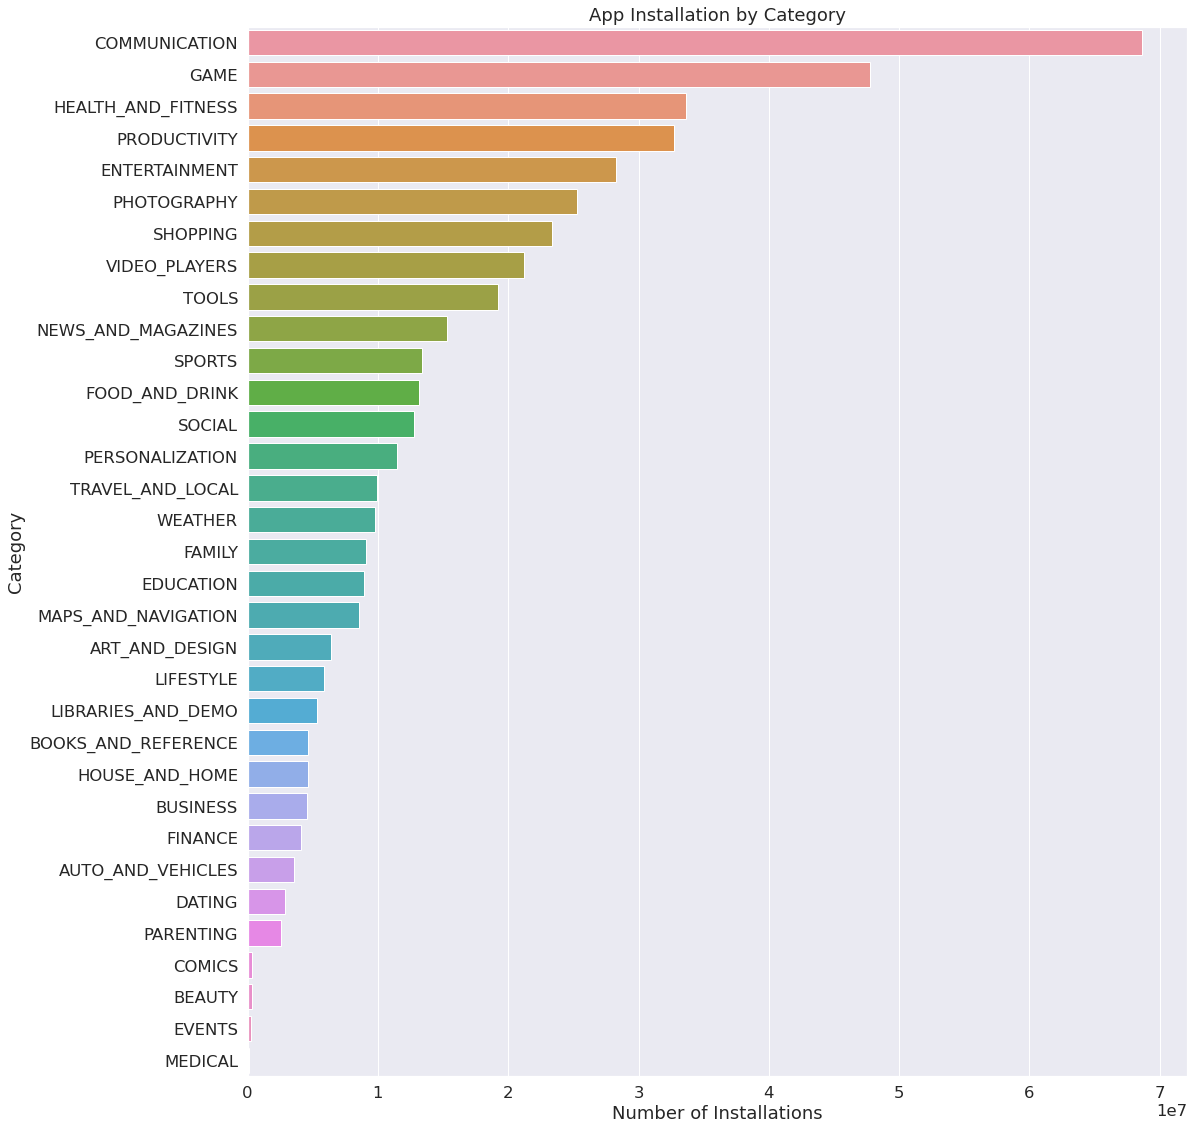

In [58]:
plt.figure(figsize= (15, 18))
sns.barplot(y = Category_rate_Install.index, x = Category_rate_Install.Installs)
plt.title("App Installation by Category")
plt.xlabel("Number of Installations");

__Number of Reviews for each Category__

In [59]:
Category_rate_Review = Category_rate.sort_values('Reviews', ascending=False)
Category_rate_Review

,Installs,Rating,Size,Reviews,Price
Category,,,,,
GAME,4.773336e+07,4.236886,43845.124311,628736.355689,0.325018
COMMUNICATION,6.867151e+07,4.076720,12226.704762,242959.502646,0.220794
VIDEO_PLAYERS,2.121028e+07,4.019469,16281.253097,204681.946903,0.008761
PHOTOGRAPHY,2.526162e+07,4.114078,16239.429126,188123.708738,0.322184
ENTERTAINMENT,2.824938e+07,4.154687,23596.800000,157911.734375,0.046719
TOOLS,1.925128e+07,4.007177,8484.219458,133337.633174,0.292823
SOCIAL,1.280923e+07,4.257692,17728.923077,131664.653846,0.012692
SHOPPING,2.336117e+07,4.213014,16932.819178,118748.712329,0.037534
SPORTS,1.342222e+07,4.200905,27033.515837,113725.389140,0.363032


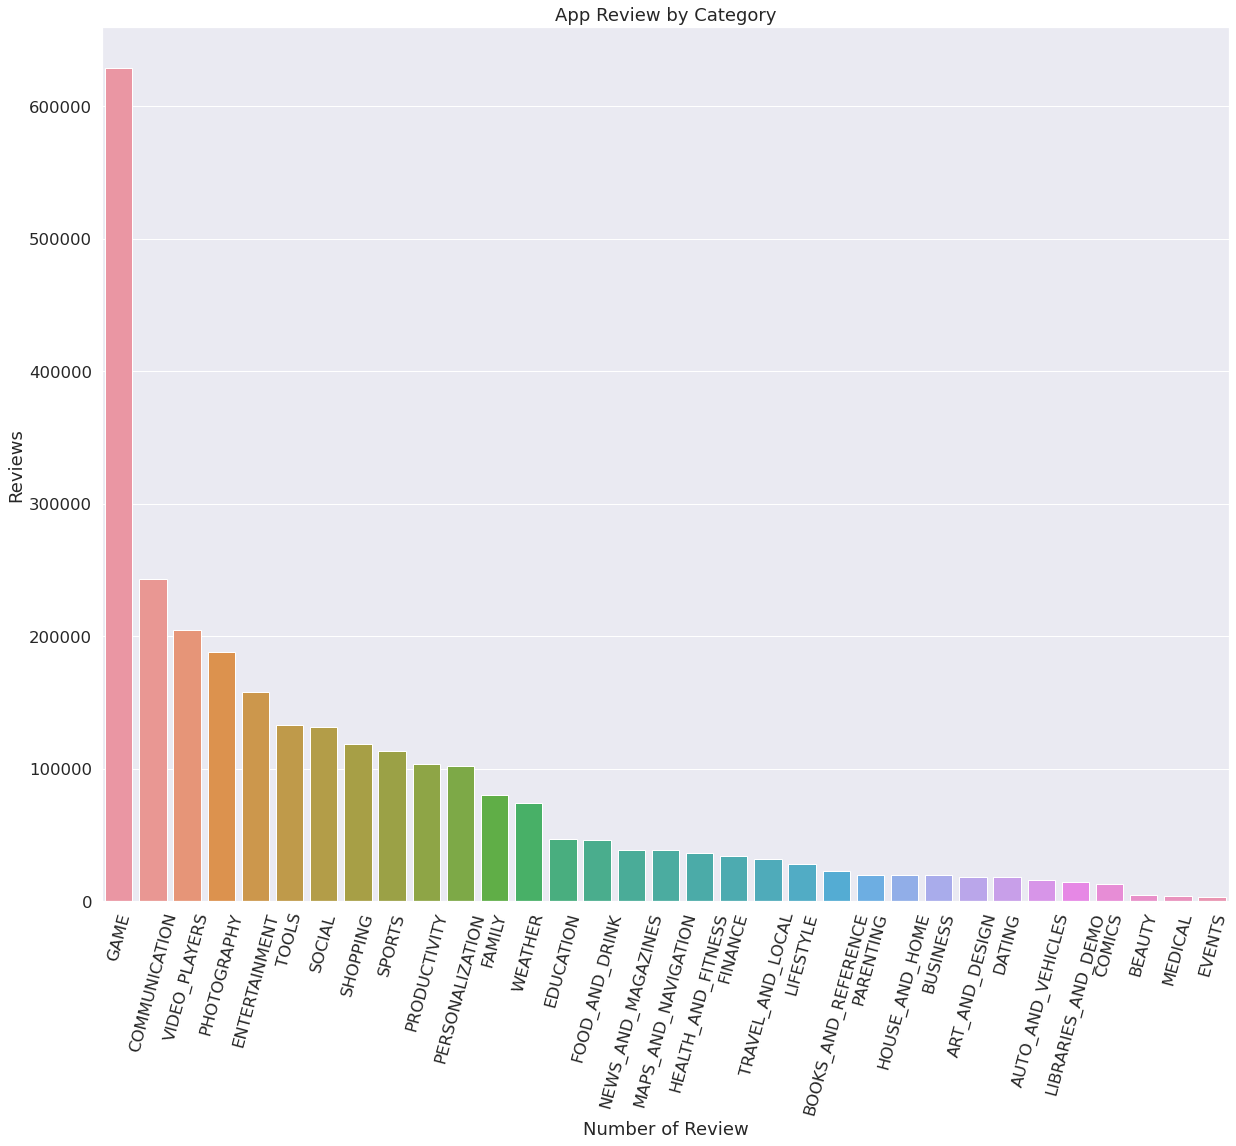

In [60]:
plt.figure(figsize= (18, 15))
sns.barplot(x = Category_rate_Review.index, y = Category_rate_Review.Reviews)
plt.title("App Review by Category")
plt.xlabel("Number of Review")
plt.xticks(rotation = 75);

__What is the average price of App in each CATEGORY?__

In [61]:
Category_rate_Price = Category_rate.sort_values('Price', ascending=False)
Category_rate_Price

,Installs,Rating,Size,Reviews,Price
Category,,,,,
FINANCE,4.087548e+06,4.104651,18395.052713,34377.201550,9.456860
LIFESTYLE,5.853231e+06,4.089963,15880.507063,28508.107807,7.261710
MEDICAL,1.246673e+05,4.167407,19254.183704,4303.003704,2.166519
FAMILY,9.071130e+06,4.180330,29682.500330,79913.601320,1.464310
WEATHER,9.785930e+06,4.242000,13223.288000,74133.900000,0.468800
PERSONALIZATION,1.147858e+07,4.324453,11856.904380,102438.248175,0.420876
SPORTS,1.342222e+07,4.200905,27033.515837,113725.389140,0.363032
GAME,4.773336e+07,4.236886,43845.124311,628736.355689,0.325018
PHOTOGRAPHY,2.526162e+07,4.114078,16239.429126,188123.708738,0.322184


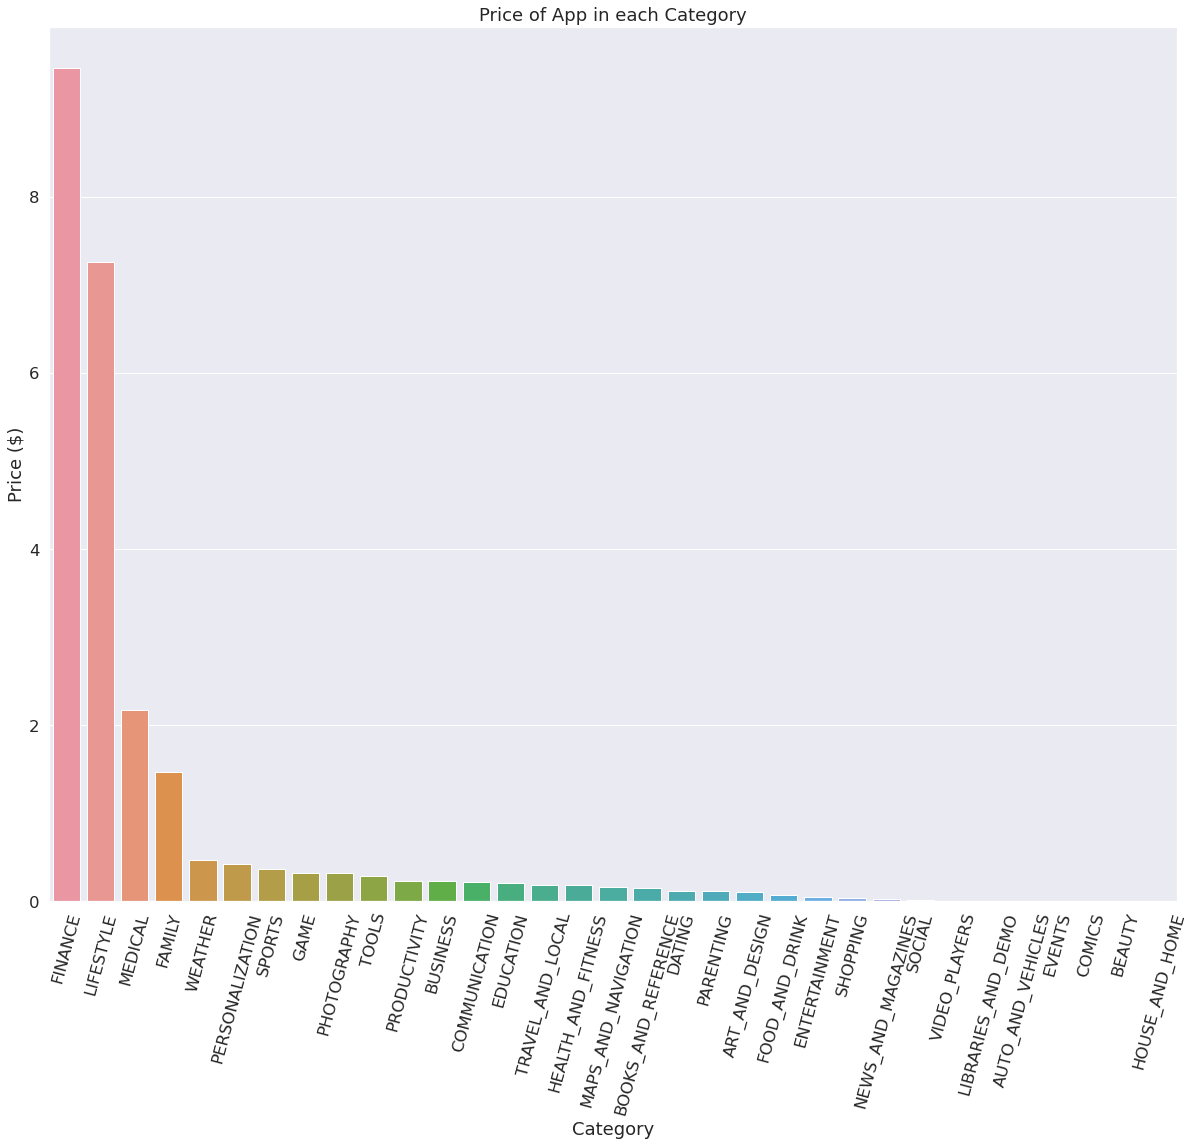

In [62]:
plt.figure(figsize= (18, 15))
sns.barplot(x = Category_rate_Price.index, y = Category_rate_Price.Price)
plt.title("Price of App in each Category")
plt.ylabel("Price ($)")
plt.xticks(rotation = 75);

__What is the average size of app in each Category?__

In [63]:
Category_rate_Size = Category_rate.sort_values('Size', ascending=False)
Category_rate_Size

,Installs,Rating,Size,Reviews,Price
Category,,,,,
GAME,4.773336e+07,4.236886,43845.124311,628736.355689,0.325018
FAMILY,9.071130e+06,4.180330,29682.500330,79913.601320,1.464310
SPORTS,1.342222e+07,4.200905,27033.515837,113725.389140,0.363032
TRAVEL_AND_LOCAL,9.919421e+06,4.011348,25367.004255,31647.326241,0.188014
ENTERTAINMENT,2.824938e+07,4.154687,23596.800000,157911.734375,0.046719
FOOD_AND_DRINK,1.314539e+07,4.109722,22964.622222,46177.527778,0.069306
HEALTH_AND_FITNESS,3.364637e+07,4.191099,22459.813613,36209.261780,0.180209
PARENTING,2.581046e+06,4.347727,22097.454545,19999.500000,0.113409
AUTO_AND_VEHICLES,3.551902e+06,4.147619,22058.200000,15750.571429,0.000000


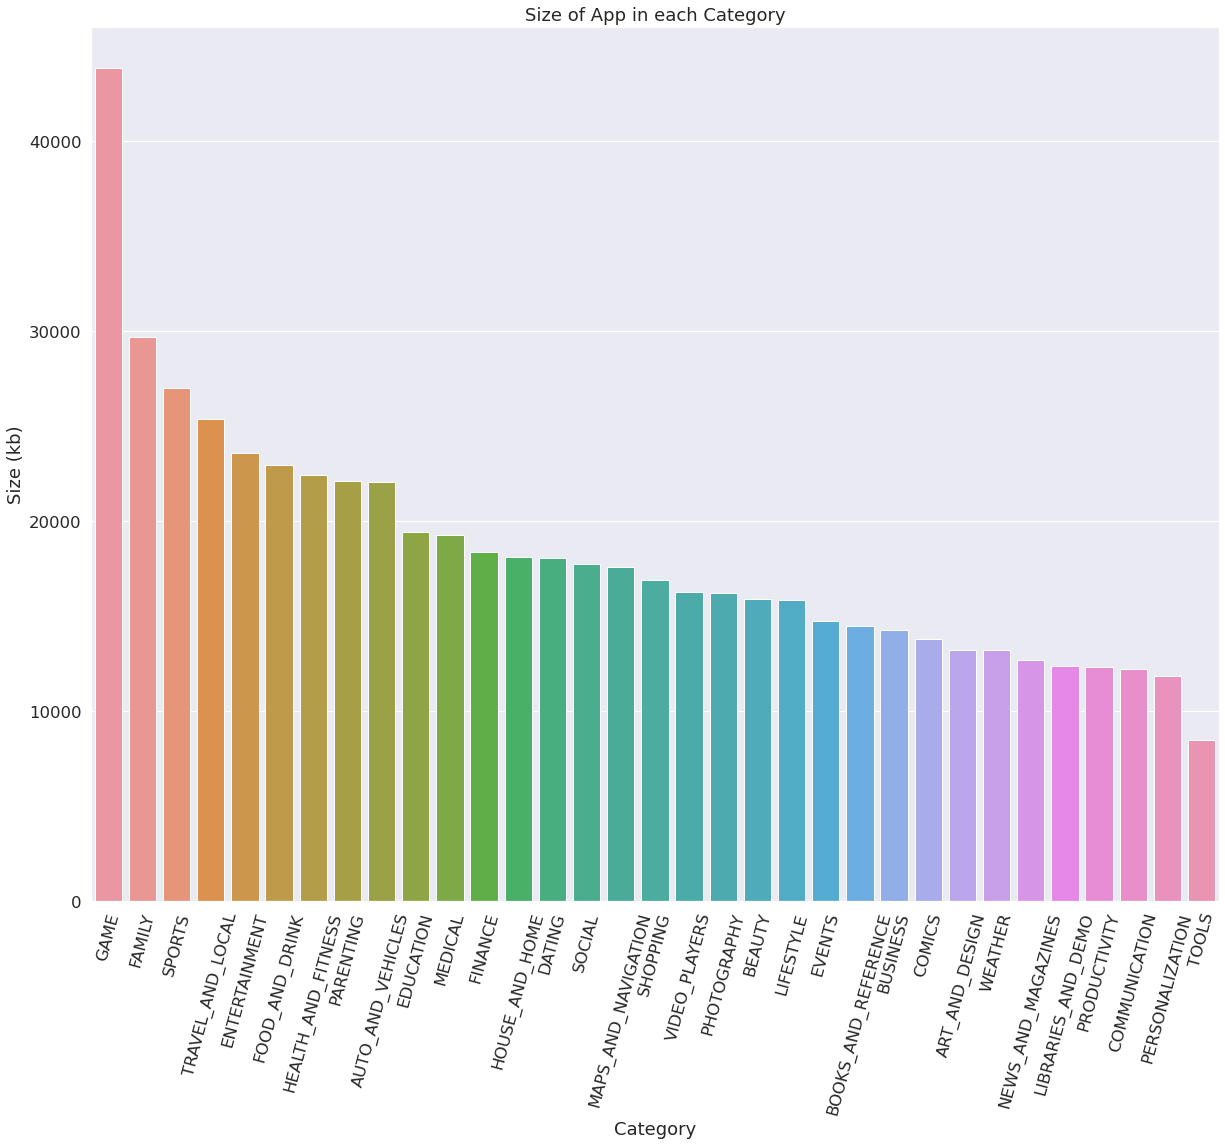

In [64]:
plt.figure(figsize= (18, 15))
sns.barplot(x = Category_rate_Size.index, y = Category_rate_Size.Size)
plt.title("Size of App in each Category")
plt.ylabel("Size (kb)")
plt.xticks(rotation = 75);

__What is the average ratings of each category?__

In [65]:
Category_ratings = Category_rate.sort_values('Rating', ascending=False)
Category_ratings

,Installs,Rating,Size,Reviews,Price
Category,,,,,
EVENTS,2.802211e+05,4.478947,14778.642105,3321.605263,0.000000
ART_AND_DESIGN,6.366002e+06,4.381034,13250.206897,18745.172414,0.102931
EDUCATION,8.945477e+06,4.373864,19456.659091,47422.409091,0.204091
PARENTING,2.581046e+06,4.347727,22097.454545,19999.500000,0.113409
PERSONALIZATION,1.147858e+07,4.324453,11856.904380,102438.248175,0.420876
BOOKS_AND_REFERENCE,4.643859e+06,4.322695,14506.587234,23138.234043,0.148156
BEAUTY,3.626000e+05,4.291892,15885.837838,5020.243243,0.000000
SOCIAL,1.280923e+07,4.257692,17728.923077,131664.653846,0.012692
WEATHER,9.785930e+06,4.242000,13223.288000,74133.900000,0.468800


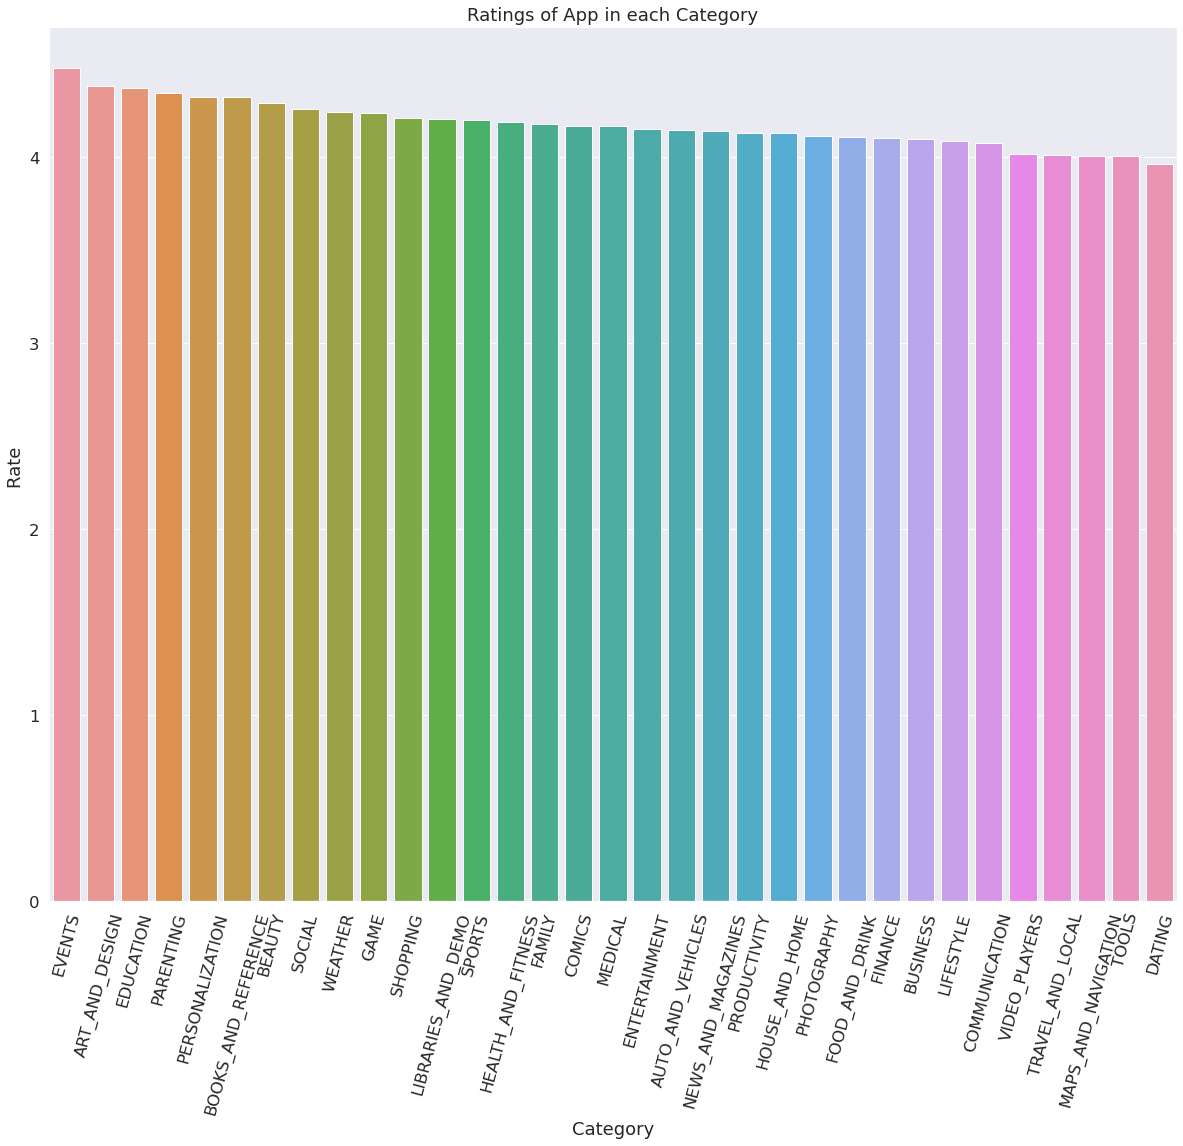

In [66]:
plt.figure(figsize= (18, 15))
sns.barplot(x = Category_ratings.index, y = Category_ratings.Rating)
plt.title("Ratings of App in each Category")
plt.ylabel("Rate ")
plt.xticks(rotation = 75);

In [67]:
jovian.commit(project='GooglePlayStore_Project', environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "huygens123/googleplaystore-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/huygens123/googleplaystore-project


'https://jovian.ai/huygens123/googleplaystore-project'